### Raster plotting and New order functionality

This notebook will give an overview of the newly added plotting and order weights builder functionality for Raster Interface

In [1]:
from splot import libpysal as splot
import matplotlib.pyplot as plt
from libpysal.weights import raster

In [2]:
da_s = raster.testDataArray((1,5,10), rand=True)
w_queen = raster.da2WSP(da_s, n_jobs=-1)
w_rook = raster.da2W(da_s, "rook")

/data/GSoC/libpysal/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 3 islands with ids: 5, 14, 48.
  warnings.warn(message)


we can see that the missing values are ignored by the `da2WSP` method and only indices of non missing values are stored in `index` attribute of `WSP` object.

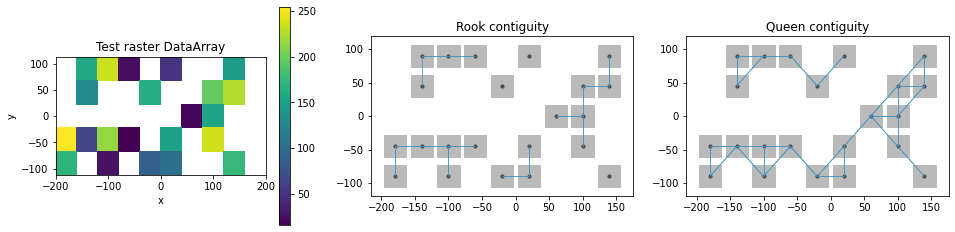

In [3]:
f,ax = plt.subplots(1,3,figsize=(4*4,4), subplot_kw=dict(aspect='equal'))
da_s.where(da_s.values>da_s.attrs["nodatavals"][0]).plot(ax=ax[0])
ax[0].set_title("Test raster DataArray")
splot.plot_spatial_weights(w_rook, da=da_s, ax=ax[1])
ax[1].set_title("Rook contiguity")
splot.plot_spatial_weights(w_queen, da=da_s, ax=ax[2])
ax[2].set_title("Queen contiguity")
plt.show()

Below, we we'll look at how the new `k` attribute (this will be renamed to `order`) adds neighbors of higher order `queen` contiguity (Still WIP).

In [4]:
da_s = raster.testDataArray((1,4,8))
w_queen = raster.da2WSP(da_s, k=2)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faf41fbd700>)

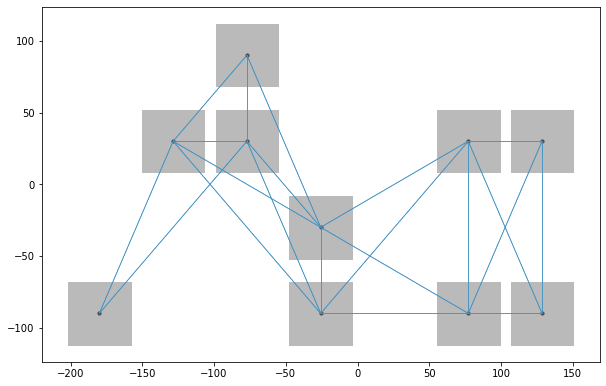

In [5]:
splot.plot_spatial_weights(w_queen, da=da_s)